# **Algoritmos de clasificación**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
iris_data = pd.read_csv('/content/Iris.csv')

In [4]:
iris_data = iris_data.drop(['Id'],axis=1)

In [5]:
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
iris_data.iloc[:,4]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [7]:
x_train,x_test,y_train,y_test=train_test_split(iris_data.iloc[:,:4],iris_data.iloc[:,4],test_size=0.2, random_state=42)

## Regresión Logística

In [8]:
reg_log = LogisticRegression()
reg_log.fit(x_train, y_train)
y_pred = reg_log.predict(x_test)

In [9]:
reglog_exactitud = accuracy_score(y_test, y_pred)
matriz_confusion = confusion_matrix(y_test, y_pred)

In [10]:
print(f'Exactitud de modelo de regresión logística: {reglog_exactitud}')

Exactitud de modelo de regresión logística: 1.0


Text(0.5, 23.52222222222222, 'Predicción')

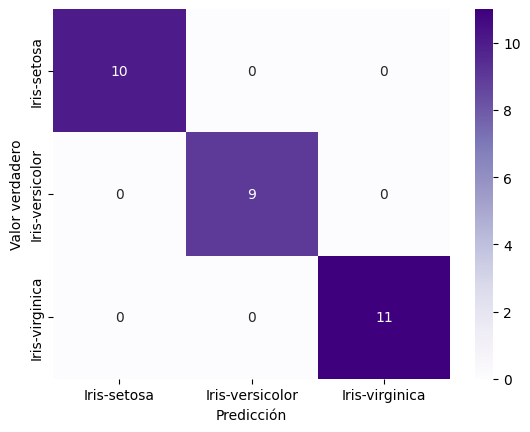

In [11]:
sns.heatmap(matriz_confusion, annot = True, cmap = 'Purples')
class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
tick_marks = [0.5,1.5,2.5]
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
plt.ylabel('Valor verdadero')
plt.xlabel('Predicción')

## Clasificación de Bayes

In [12]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)

In [13]:
bayes_exactitud = nb.score(x_test,y_test)
matriz_confusion = confusion_matrix(y_test, y_pred)

In [14]:
print(f'Exactitud de modelo de Bayes: {bayes_exactitud}')

Exactitud de modelo de Bayes: 1.0


Text(0.5, 23.52222222222222, 'Predicción')

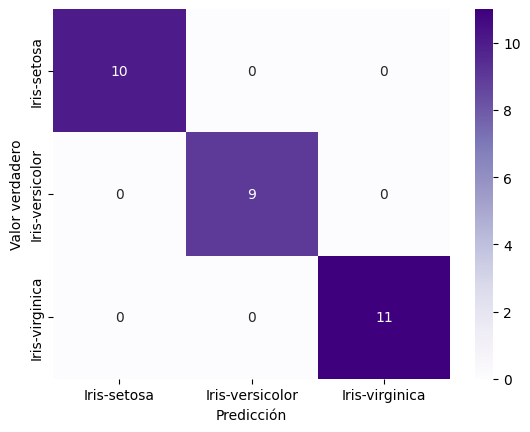

In [15]:
sns.heatmap(matriz_confusion, annot = True, cmap = 'Purples')
class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
tick_marks = [0.5,1.5,2.5]
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
plt.ylabel('Valor verdadero')
plt.xlabel('Predicción')

## Análisis de discriminante

In [16]:
adl = LinearDiscriminantAnalysis()
adl.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [17]:
y_pred = adl.predict(x_test)

In [18]:
adl_exactitud = accuracy_score(y_test, y_pred)
matriz_confusion = confusion_matrix(y_test,y_pred)

In [19]:
print(f'Exactitud de modelo de análisis de discriminante: {adl_exactitud}')

Exactitud de modelo de análisis de discriminante: 1.0


Text(0.5, 23.52222222222222, 'Predicción')

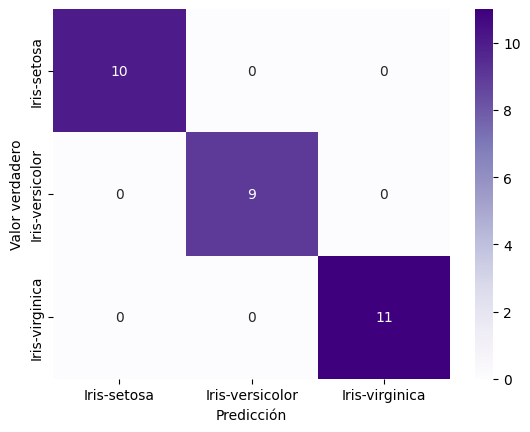

In [20]:
sns.heatmap(matriz_confusion, annot = True, cmap = 'Purples')
class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
tick_marks = [0.5,1.5,2.5]
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
plt.ylabel('Valor verdadero')
plt.xlabel('Predicción')

## Conclusión

Cuando se trata de escoger el mejor modelo para predecir qué tipo de planta es según sus medidas, hay tres opciones: regresión logística, Naive Bayes y análisis discriminante. Cada uno tiene sus pros y contras.

La regresión logística es buena para problemas con varias opciones y es fácil de entender. Te da probabilidades de pertenencia a cada tipo de planta, pero puede no ser tan buena si las medidas y las plantas tienen relaciones complicadas.

Naive Bayes es rápido y trabaja bien con pocos datos. Aunque supone que las medidas son independientes, lo que a veces no es verdad, en muchos casos esto no afecta mucho el resultado.

El análisis discriminante es útil para ver cómo las medidas se diferencian entre los tipos de planta. Puede manejar varias opciones y ayuda a reducir la información. Pero necesita que las medidas sigan ciertas reglas.